In [25]:
from statsmodels.tsa.api import VAR
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.base.datetools import dates_from_str
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Choi\Desktop\Dataset\Time_project\KOR\VAR\VAR.csv")

In [4]:
df

,year,quarter,GDP,Rf,Consumption,exchange_rate,ge_change,P_level,TB,KOSPI
0,2000,1,159069.9,9.110,84574.8,1125.41,1.7014,66.084,-266.9,877.733337
1,2000,2,160558.1,8.860,85035.0,1116.29,0.0518,65.995,2653.9,759.496664
2,2000,3,165470.9,7.940,87167.2,1115.27,2.2712,66.882,3873.8,669.269979
3,2000,4,166535.5,7.310,89108.8,1164.11,3.8214,67.326,3920.0,509.443329
4,2001,1,172146.3,5.750,90934.8,1271.68,8.1688,68.524,303.9,573.076640
...,...,...,...,...,...,...,...,...,...,...
78,2019,3,481410.5,1.280,220955.4,1193.24,1.2176,104.860,19204.4,2018.463379
79,2019,4,484555.9,1.413,223491.4,1175.81,2.6515,105.150,18132.9,2123.036621
80,2020,1,476805.3,1.234,209133.1,1193.60,2.1872,105.710,13333.9,1953.553345
81,2020,2,472222.6,0.916,214213.4,1220.81,0.7692,104.840,5835.0,2028.496704


In [5]:
date = df[['year', 'quarter']].astype(int).astype(str)

In [6]:
quarter = date["year"] + "Q" + date["quarter"]

In [7]:
quarter = dates_from_str(quarter)

In [8]:
df.index = pd.DatetimeIndex(quarter)

In [9]:
df.drop(labels=["year","quarter"],inplace=True,axis=1)

In [10]:
data = np.log(df).diff().dropna()

C:\Users\Choi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [11]:
model=VAR(data)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [12]:
result = model.fit()

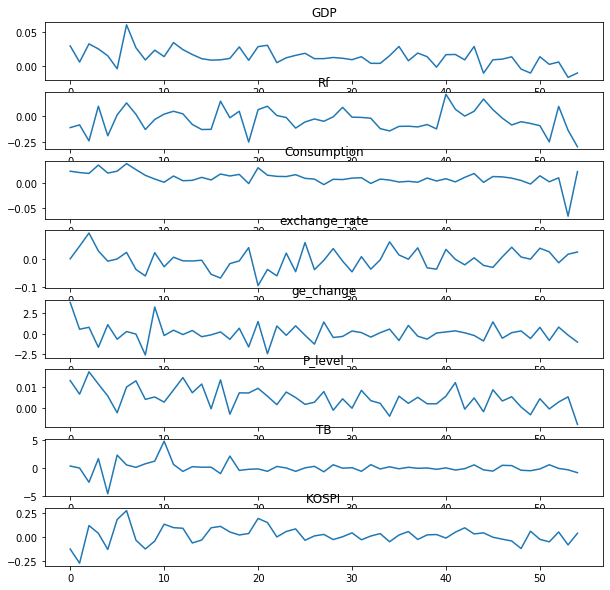

In [13]:
ax = result.plot()

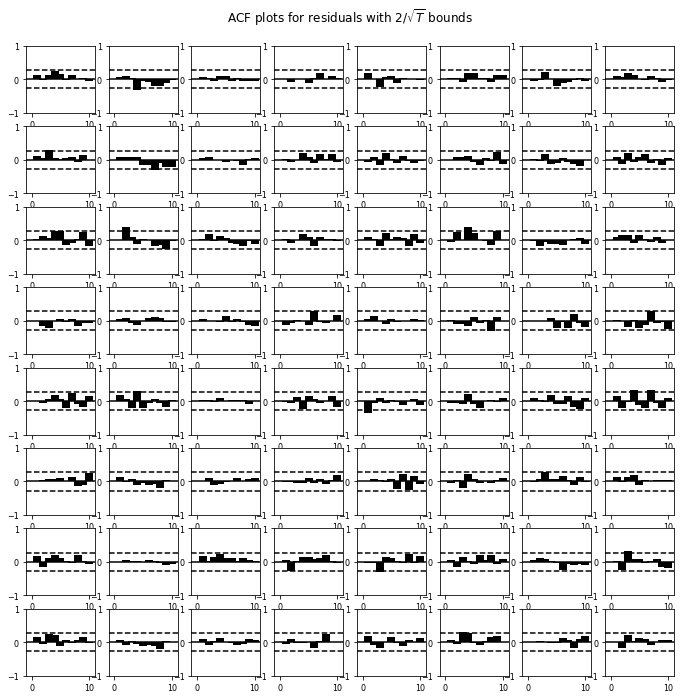

In [14]:
ax = result.plot_acorr()

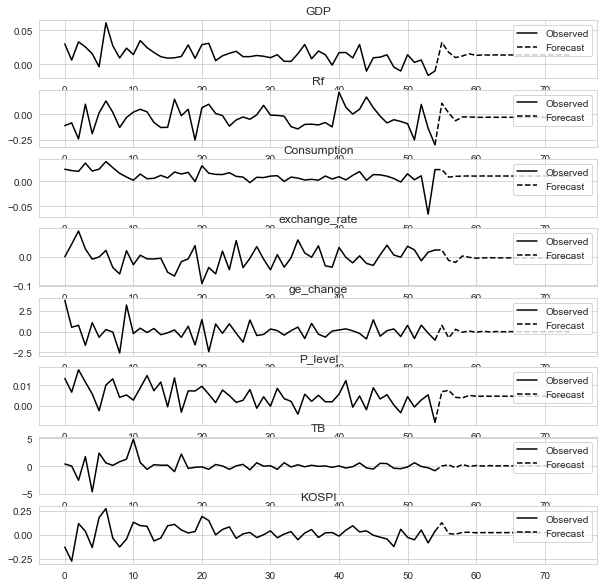

In [28]:
sns.set_style("whitegrid")
ax = result.plot_forecast(20,plot_stderr=False)